In [17]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import os.path

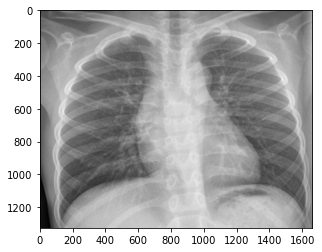

In [18]:
NORMAL_img=image.load_img("D:/CODING/DataSeTs/xray_dataset_covid19/train/NORMAL/IM-0006-0001.jpeg")
plt.imshow(NORMAL_img)

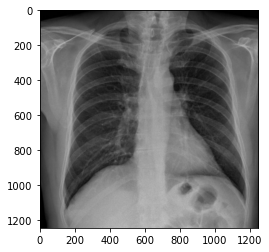

In [19]:
PNEUMONIA_img=image.load_img("D:/CODING/DataSeTs/xray_dataset_covid19/train/PNEUMONIA/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg")
plt.imshow(PNEUMONIA_img)

In [20]:
cv2.imread("D:/CODING/DataSeTs/xray_dataset_covid19/train/NORMAL/IM-0006-0001.jpeg").shape


(1326, 1663, 3)

In [32]:
train = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest' 
                              )

validation=ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest' 
                              )

In [33]:
train_data=train.flow_from_directory('D:/CODING/DataSeTs/xray_dataset_covid19/train',
                                     target_size=(200,200),
                                     batch_size=10,
                                     class_mode='binary')

validation_data=train.flow_from_directory('D:/CODING/DataSeTs/xray_dataset_covid19/validation',
                                     target_size=(200,200),
                                     batch_size=10,
                                     class_mode='binary')
                                    

Found 148 images belonging to 2 classes.
Found 12 images belonging to 2 classes.


In [34]:
train_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [35]:
train_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(200,200,3)) ,
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(32,(3,3), activation='relu') ,
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(64,(3,3), activation='relu') ,
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(128,activation='relu'),
                                  tf.keras.layers.Dense(256,activation='relu'),
                                 tf.keras.layers.Dense(512,activation='relu'),
                                 tf.keras.layers.Dense(1,activation='sigmoid')
                                                                 
])

In [40]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [41]:
r=model.fit(train_data,steps_per_epoch=3,epochs=30,validation_data=validation_data)

Epoch 1/30
3/3 [==============================] - 3s 772ms/step - loss: 1.0264 - accuracy: 0.4000 - val_loss: 0.7306 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 2s 549ms/step - loss: 0.7354 - accuracy: 0.4286 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 2s 617ms/step - loss: 0.7023 - accuracy: 0.4667 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 2s 550ms/step - loss: 0.7220 - accuracy: 0.5333 - val_loss: 0.7110 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 1s 507ms/step - loss: 0.7041 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 2s 552ms/step - loss: 0.6809 - accuracy: 0.6333 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 7/30
3/3 [==============================] - 2s 635ms/step - loss: 0.6730 - accuracy: 0.7667 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 8/30
3/3 [====

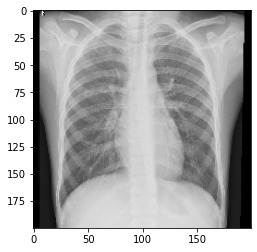

1/1 [==============================] - 0s 94ms/step
Negetive


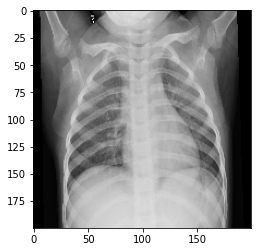

1/1 [==============================] - 0s 20ms/step
Negetive


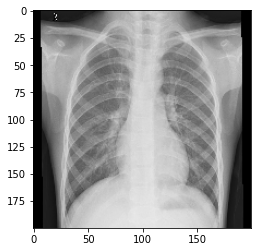

1/1 [==============================] - 0s 21ms/step
Negetive


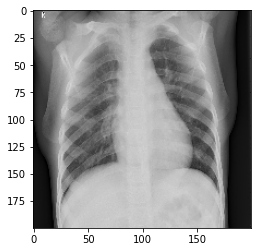

1/1 [==============================] - 0s 22ms/step
Negetive


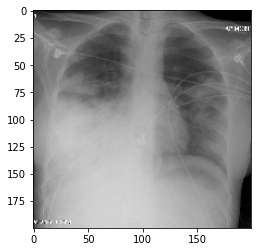

1/1 [==============================] - 0s 21ms/step
Positive


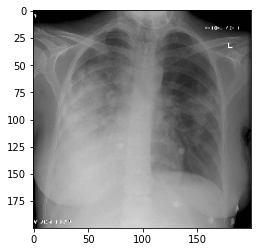

1/1 [==============================] - 0s 20ms/step
Positive


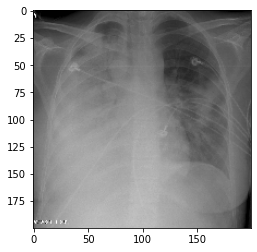

1/1 [==============================] - 0s 19ms/step
Positive


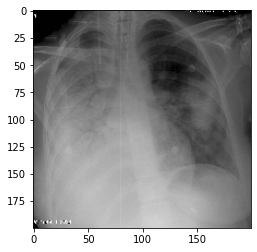

1/1 [==============================] - 0s 19ms/step
Positive


In [42]:
dir_path="D:/CODING/DataSeTs/xray_dataset_covid19/test/mixed"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X=image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images=np.vstack([X])
    test=model.predict(images)

    if test==0:
        print("Negetive")
    else:
        print("Positive")
    

In [43]:
if os.path.isfile('D:\CODING\Models_ready/xraycorona.h5') is False:
  model.save('D:\CODING\Models_ready/xraycorona.h5')

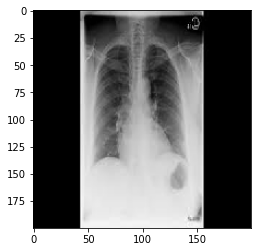

1/1 [==============================] - 0s 20ms/step
Negetive


In [44]:
img_path="C:/Users/jghfjgh/Downloads/download (1).jfif"
img=image.load_img(img_path,target_size=(200,200))
plt.imshow(img)
plt.show()

X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
test=model.predict(X)
if test==0:
    print("Negetive")
else:
     print("Positive")
    



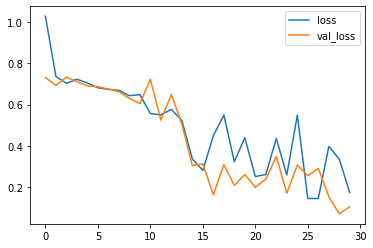

In [45]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

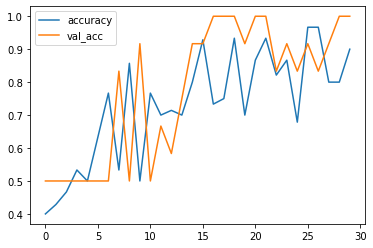

In [46]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()